In [249]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Regret vs MSE

In [250]:
twostage = pd.read_csv("Rslt/Twostage_rslt.csv")
spo = pd.read_csv("Rslt/SPO_rslt.csv")
bb = pd.read_csv("Rslt/Blackbox_rslt.csv")
listwise = pd.read_csv("Rslt/Listwise_rslt.csv")
pairwise = pd.read_csv("Rslt/Pairwise_rslt.csv")
pointwise = pd.read_csv("Rslt/Pointwise_rslt.csv")
pairwise_diff = pd.read_csv("Rslt/Pairwisediff_rslt.csv")
nce = pd.read_csv("Rslt/NCE_rslt.csv")
mapp = pd.read_csv("Rslt/MAP_rslt.csv")

In [251]:
N, noise, deg = 1000,0.5,1

In [252]:
lr, l1_weight = 0.5, 1e-5
twostage_selected = twostage[(twostage['N']==N)&
                                           (twostage['deg']==deg) & 
                                           (twostage['noise']==noise)]
twostage_selected = twostage_selected[(twostage_selected['l1_weight']==l1_weight)&
                                                   (twostage_selected['lr']==lr)]

In [253]:
lr, l1_weight = 0.1, 1e-5
spo_selected = spo[(spo['N']==N)&(spo['deg']==deg) & 
                                           (spo['noise']==noise)]
spo_selected = spo_selected[(spo_selected['l1_weight']==l1_weight)&
                                         (spo_selected['lr']==lr)]

In [254]:
lr,mu, l1_weight = 0.5,1., 1e-5
bb_selected = bb[(bb['N']==N)&(bb['deg']==deg) & 
                                           (bb['noise']==noise)]
bb_selected = bb_selected[(bb_selected['l1_weight']==l1_weight)&
                                         (bb_selected['lr']==lr)&(bb_selected['mu']==mu)]


In [255]:
lr, margin, growth,l1_weight = 0.1,1.,0.1,1e-5
pairwise_selected = pairwise[(pairwise['N']==N)&
                                           (pairwise['deg']==deg) & 
                                           (pairwise['noise']==noise)]
pairwise_selected = pairwise_selected[(pairwise_selected['l1_weight']== l1_weight)&
                                       (pairwise_selected['margin']== margin)& (pairwise_selected['lr']== lr)&
                                                   (pairwise_selected['growth']== growth)]


In [256]:
lr,temperature,  growth,l1_weight = 0.1,1, 0.1,1e-5
listwise_selected = listwise[(listwise['N']==N)&
                                           (listwise['deg']==deg) & 
                                           (listwise['noise']==noise)]
listwise_selected = listwise_selected[(listwise_selected['l1_weight']== l1_weight)&
                        (listwise_selected['lr']== lr)&(listwise_selected['temperature']== temperature)&
                                                   (listwise_selected['growth']== growth)]


In [257]:
lr, growth,l1_weight = 0.8, 0.1,1e-5
pointwise_selected = pointwise[(pointwise['N']==N)&
                                           (pointwise['deg']==deg) & 
                                           (pointwise['noise']==noise)]
pointwise_selected = pointwise_selected[(pointwise_selected['l1_weight']== l1_weight)&
                        (pointwise_selected['lr']== lr)&(pointwise_selected['growth']== growth)]


In [258]:
lr, growth,l1_weight = 0.1, 0.1,1e-5
pairwise_diff_selected = pairwise_diff[(pairwise_diff['N']==N)&
                                           (pairwise_diff['deg']==deg) & 
                                           (pairwise_diff['noise']==noise)]
pairwise_diff_selected = pairwise_diff_selected[(pairwise_diff_selected['l1_weight']== l1_weight)&
                        (pairwise_diff_selected['lr']== lr)&(pairwise_diff_selected['growth']== growth)]

In [259]:
lr, growth,l1_weight = 0.5, 0.1,1e-5
nce_selected = nce[(nce['N']==N)&(nce['deg']==deg) & 
                                           (nce['noise']==noise)]
nce_selected = nce_selected[(nce_selected['l1_weight']== l1_weight)&
                        (nce_selected['lr']== lr)&(nce_selected['growth']== growth)]


In [260]:
lr, growth,l1_weight = 0.05, 0.1,1e-5
mapp_selected = mapp[(mapp['N']==N)&(mapp['deg']==deg) & 
                                           (mapp['noise']==noise)]
mapp_selected = mapp_selected[(mapp_selected['l1_weight']== l1_weight)&
                        (mapp_selected['lr']== lr)&(mapp_selected['growth']== growth)]


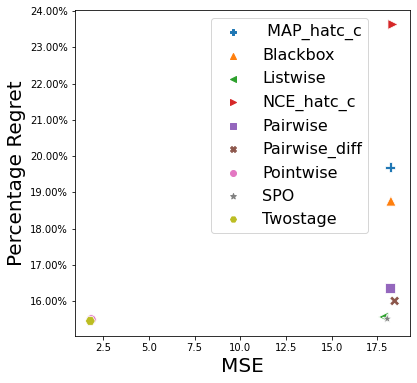

In [124]:
deg_df = pd.concat([ pointwise_selected, pairwise_selected,pairwise_diff_selected,
                       listwise_selected , nce_selected,
                        mapp_selected,spo_selected, bb_selected ,
                        twostage_selected])
deg_df =deg_df.groupby('model').agg({'val_mse':'mean','val_regret':'mean'}).reset_index(drop=False)
fig, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(data= deg_df, x="val_mse", y="val_regret", hue="model", style="model",
               markers=['P','^','<','>','s','X','o','*','H'],s=100)

plt.legend(prop={'size': 16},loc=1, bbox_to_anchor=(0., 0., 0.9, 1.))
# plt.ylim(0.85, 1.)
# ax.set_xticks(np.arange(0,5, 1))
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
plt.xlabel("MSE",fontsize=20)
plt.ylabel("Percentage Regret",fontsize=20)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.savefig("figures/data_N_{}_noise_{}_deg_{}_regvsmse.png".format(N,noise,deg),
bbox_inches='tight', dpi = 200)

plt.show()

In [125]:
N, noise, deg = 1000,0.5,2

In [126]:
lr, l1_weight = 0.5, 1e-5
twostage_selected = twostage[(twostage['N']==N)&
                                           (twostage['deg']==deg) & 
                                           (twostage['noise']==noise)]
twostage_selected = twostage_selected[(twostage_selected['l1_weight']==l1_weight)&
                                                   (twostage_selected['lr']==lr)]

In [127]:
lr, l1_weight = 0.5, 1e-5
spo_selected = spo[(spo['N']==N)&(spo['deg']==deg) & 
                                           (spo['noise']==noise)]
spo_selected = spo_selected[(spo_selected['l1_weight']==l1_weight)&
                                         (spo_selected['lr']==lr)]

In [128]:
lr,mu, l1_weight = 0.5,1., 1e-5
bb_selected = bb[(bb['N']==N)&(bb['deg']==deg) & 
                                           (bb['noise']==noise)]
bb_selected = bb_selected[(bb_selected['l1_weight']==l1_weight)&
                                         (bb_selected['lr']==lr)&(bb_selected['mu']==mu)]


In [129]:
lr, margin, growth,l1_weight = 0.1,0.1,0.1,1e-5
pairwise_selected = pairwise[(pairwise['N']==N)&
                                           (pairwise['deg']==deg) & 
                                           (pairwise['noise']==noise)]
pairwise_selected = pairwise_selected[(pairwise_selected['l1_weight']== l1_weight)&
                                       (pairwise_selected['margin']== margin)& (pairwise_selected['lr']== lr)&
                                                   (pairwise_selected['growth']== growth)]


In [130]:
lr,temperature,  growth,l1_weight = 0.1,0.1, 0.1,1e-5
listwise_selected = listwise[(listwise['N']==N)&
                                           (listwise['deg']==deg) & 
                                           (listwise['noise']==noise)]
listwise_selected = listwise_selected[(listwise_selected['l1_weight']== l1_weight)&
                        (listwise_selected['lr']== lr)&(listwise_selected['temperature']== temperature)&
                                                   (listwise_selected['growth']== growth)]


In [131]:
lr, growth,l1_weight = 0.8, 0.1,1e-5
pointwise_selected = pointwise[(pointwise['N']==N)&
                                           (pointwise['deg']==deg) & 
                                           (pointwise['noise']==noise)]
pointwise_selected = pointwise_selected[(pointwise_selected['l1_weight']== l1_weight)&
                        (pointwise_selected['lr']== lr)&(pointwise_selected['growth']== growth)]


In [132]:
lr, growth,l1_weight = 0.1, 0.1,1e-5
pairwise_diff_selected = pairwise_diff[(pairwise_diff['N']==N)&
                                           (pairwise_diff['deg']==deg) & 
                                           (pairwise_diff['noise']==noise)]
pairwise_diff_selected = pairwise_diff_selected[(pairwise_diff_selected['l1_weight']== l1_weight)&
                        (pairwise_diff_selected['lr']== lr)&(pairwise_diff_selected['growth']== growth)]

In [133]:
lr, growth,l1_weight = 0.5, 0.1,1e-5
nce_selected = nce[(nce['N']==N)&(nce['deg']==deg) & 
                                           (nce['noise']==noise)]
nce_selected = nce_selected[(nce_selected['l1_weight']== l1_weight)&
                        (nce_selected['lr']== lr)&(nce_selected['growth']== growth)]


In [134]:
lr, growth,l1_weight = 0.05, 0.1,1e-5
mapp_selected = mapp[(mapp['N']==N)&(mapp['deg']==deg) & 
                                           (mapp['noise']==noise)]
mapp_selected = mapp_selected[(mapp_selected['l1_weight']== l1_weight)&
                        (mapp_selected['lr']== lr)&(mapp_selected['growth']== growth)]

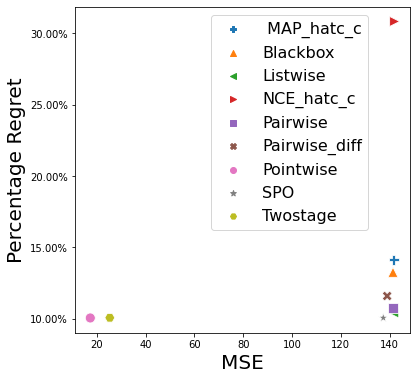

In [135]:
deg_df = pd.concat([ pointwise_selected, pairwise_selected,pairwise_diff_selected,
                       listwise_selected , nce_selected,
                        mapp_selected,spo_selected, bb_selected ,
                        twostage_selected])
deg_df =deg_df.groupby('model').agg({'val_mse':'mean','val_regret':'mean'}).reset_index(drop=False)
fig, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(data= deg_df, x="val_mse", y="val_regret", hue="model", style="model",
               markers=['P','^','<','>','s','X','o','*','H'],s=100)

plt.legend(prop={'size': 16},loc=1, bbox_to_anchor=(0., 0., 0.9, 1.))
# plt.ylim(0.85, 1.)
# ax.set_xticks(np.arange(0,5, 1))
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
plt.xlabel("MSE",fontsize=20)
plt.ylabel("Percentage Regret",fontsize=20)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.savefig("figures/data_N_{}_noise_{}_deg_{}_regvsmse.png".format(N,noise,deg),
bbox_inches='tight', dpi = 200)

plt.show()

In [136]:
N, noise, deg = 1000,0.5,4

In [137]:
lr, l1_weight = 0.1, 1e-5
twostage_selected = twostage[(twostage['N']==N)&
                                           (twostage['deg']==deg) & 
                                           (twostage['noise']==noise)]
twostage_selected = twostage_selected[(twostage_selected['l1_weight']==l1_weight)&
                                                   (twostage_selected['lr']==lr)]

In [138]:
lr, l1_weight = 0.5, 1e-5
spo_selected = spo[(spo['N']==N)&(spo['deg']==deg) & 
                                           (spo['noise']==noise)]
spo_selected = spo_selected[(spo_selected['l1_weight']==l1_weight)&
                                         (spo_selected['lr']==lr)]

In [139]:
lr,mu, l1_weight = 0.5,1., 1e-5
bb_selected = bb[(bb['N']==N)&(bb['deg']==deg) & 
                                           (bb['noise']==noise)]
bb_selected = bb_selected[(bb_selected['l1_weight']==l1_weight)&
                                         (bb_selected['lr']==lr)&(bb_selected['mu']==mu)]


In [140]:
lr, margin, growth,l1_weight = 0.1,0.1,0.1,1e-5
pairwise_selected = pairwise[(pairwise['N']==N)&
                                           (pairwise['deg']==deg) & 
                                           (pairwise['noise']==noise)]
pairwise_selected = pairwise_selected[(pairwise_selected['l1_weight']== l1_weight)&
                                       (pairwise_selected['margin']== margin)& (pairwise_selected['lr']== lr)&
                                                   (pairwise_selected['growth']== growth)]


In [141]:
lr,temperature,  growth,l1_weight = 0.1,0.05, 0.1,1e-5
listwise_selected = listwise[(listwise['N']==N)&
                                           (listwise['deg']==deg) & 
                                           (listwise['noise']==noise)]
listwise_selected = listwise_selected[(listwise_selected['l1_weight']== l1_weight)&
                        (listwise_selected['lr']== lr)&(listwise_selected['temperature']== temperature)&
                                                   (listwise_selected['growth']== growth)]


In [142]:
lr, growth,l1_weight = 0.8, 0.1,1e-5
pointwise_selected = pointwise[(pointwise['N']==N)&
                                           (pointwise['deg']==deg) & 
                                           (pointwise['noise']==noise)]
pointwise_selected = pointwise_selected[(pointwise_selected['l1_weight']== l1_weight)&
                        (pointwise_selected['lr']== lr)&(pointwise_selected['growth']== growth)]


In [143]:
lr, growth,l1_weight = 0.1, 0.1,1e-5
pairwise_diff_selected = pairwise_diff[(pairwise_diff['N']==N)&
                                           (pairwise_diff['deg']==deg) & 
                                           (pairwise_diff['noise']==noise)]
pairwise_diff_selected = pairwise_diff_selected[(pairwise_diff_selected['l1_weight']== l1_weight)&
                        (pairwise_diff_selected['lr']== lr)&(pairwise_diff_selected['growth']== growth)]

In [144]:
lr, growth,l1_weight = 0.5, 0.1,1e-5
nce_selected = nce[(nce['N']==N)&(nce['deg']==deg) & 
                                           (nce['noise']==noise)]
nce_selected = nce_selected[(nce_selected['l1_weight']== l1_weight)&
                        (nce_selected['lr']== lr)&(nce_selected['growth']== growth)]


In [145]:
lr, growth,l1_weight = 0.05, 0.1,1e-5
mapp_selected = mapp[(mapp['N']==N)&(mapp['deg']==deg) & 
                                           (mapp['noise']==noise)]
mapp_selected = mapp_selected[(mapp_selected['l1_weight']== l1_weight)&
                        (mapp_selected['lr']== lr)&(mapp_selected['growth']== growth)]

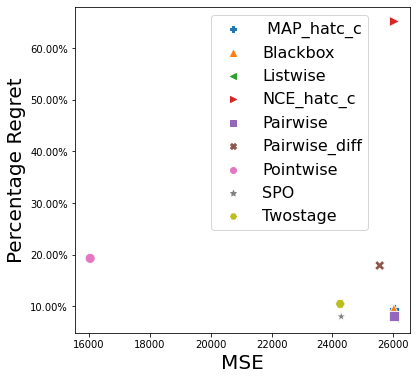

In [146]:
deg_df = pd.concat([ pointwise_selected, pairwise_selected,pairwise_diff_selected,
                       listwise_selected , nce_selected,
                        mapp_selected,spo_selected, bb_selected ,
                        twostage_selected])
deg_df =deg_df.groupby('model').agg({'val_mse':'mean','val_regret':'mean'}).reset_index(drop=False)
fig, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(data= deg_df, x="val_mse", y="val_regret", hue="model", style="model",
               markers=['P','^','<','>','s','X','o','*','H'],s=100)

plt.legend(prop={'size': 16},loc=1, bbox_to_anchor=(0., 0., 0.9, 1.))
# plt.ylim(0.85, 1.)
# ax.set_xticks(np.arange(0,5, 1))
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
plt.xlabel("MSE",fontsize=20)
plt.ylabel("Percentage Regret",fontsize=20)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.savefig("figures/data_N_{}_noise_{}_deg_{}_regvsmse.png".format(N,noise,deg),
bbox_inches='tight', dpi = 200)

plt.show()

In [147]:
N, noise, deg = 1000,0.5,6

In [148]:
lr, l1_weight = 0.5, 1e-5
twostage_selected = twostage[(twostage['N']==N)&
                                           (twostage['deg']==deg) & 
                                           (twostage['noise']==noise)]
twostage_selected = twostage_selected[(twostage_selected['l1_weight']==l1_weight)&
                                                   (twostage_selected['lr']==lr)]

In [149]:
lr, l1_weight = 0.5, 1e-5
spo_selected = spo[(spo['N']==N)&(spo['deg']==deg) & 
                                           (spo['noise']==noise)]
spo_selected = spo_selected[(spo_selected['l1_weight']==l1_weight)&
                                         (spo_selected['lr']==lr)]

In [150]:
lr,mu, l1_weight = 0.5,1., 1e-5
bb_selected = bb[(bb['N']==N)&(bb['deg']==deg) & 
                                           (bb['noise']==noise)]
bb_selected = bb_selected[(bb_selected['l1_weight']==l1_weight)&
                                         (bb_selected['lr']==lr)&(bb_selected['mu']==mu)]


In [151]:
lr, margin, growth,l1_weight = 0.1,0.1,0.1,1e-5
pairwise_selected = pairwise[(pairwise['N']==N)&
                                           (pairwise['deg']==deg) & 
                                           (pairwise['noise']==noise)]
pairwise_selected = pairwise_selected[(pairwise_selected['l1_weight']== l1_weight)&
                                       (pairwise_selected['margin']== margin)& (pairwise_selected['lr']== lr)&
                                                   (pairwise_selected['growth']== growth)]


In [152]:
lr,temperature,  growth,l1_weight = 0.1,0.05, 0.1,1e-5
listwise_selected = listwise[(listwise['N']==N)&
                                           (listwise['deg']==deg) & 
                                           (listwise['noise']==noise)]
listwise_selected = listwise_selected[(listwise_selected['l1_weight']== l1_weight)&
                        (listwise_selected['lr']== lr)&(listwise_selected['temperature']== temperature)&
                                                   (listwise_selected['growth']== growth)]


In [153]:
lr, growth,l1_weight = 0.8, 0.1,1e-5
pointwise_selected = pointwise[(pointwise['N']==N)&
                                           (pointwise['deg']==deg) & 
                                           (pointwise['noise']==noise)]
pointwise_selected = pointwise_selected[(pointwise_selected['l1_weight']== l1_weight)&
                        (pointwise_selected['lr']== lr)&(pointwise_selected['growth']== growth)]


In [154]:
lr, growth,l1_weight = 0.5, 0.1,1e-5
pairwise_diff_selected = pairwise_diff[(pairwise_diff['N']==N)&
                                           (pairwise_diff['deg']==deg) & 
                                           (pairwise_diff['noise']==noise)]
pairwise_diff_selected = pairwise_diff_selected[(pairwise_diff_selected['l1_weight']== l1_weight)&
                        (pairwise_diff_selected['lr']== lr)&(pairwise_diff_selected['growth']== growth)]

In [155]:
lr, growth,l1_weight = 0.5, 0.1,1e-5
nce_selected = nce[(nce['N']==N)&(nce['deg']==deg) & 
                                           (nce['noise']==noise)]
nce_selected = nce_selected[(nce_selected['l1_weight']== l1_weight)&
                        (nce_selected['lr']== lr)&(nce_selected['growth']== growth)]


In [156]:
lr, growth,l1_weight = 0.7, 0.1,1e-5
mapp_selected = mapp[(mapp['N']==N)&(mapp['deg']==deg) & 
                                           (mapp['noise']==noise)]
mapp_selected = mapp_selected[(mapp_selected['l1_weight']== l1_weight)&
                        (mapp_selected['lr']== lr)&(mapp_selected['growth']== growth)]

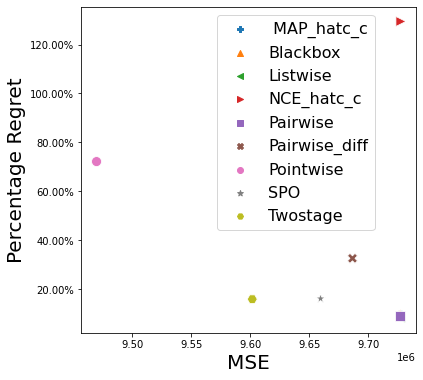

In [157]:
deg_df = pd.concat([ pointwise_selected, pairwise_selected,pairwise_diff_selected,
                       listwise_selected , nce_selected,
                        mapp_selected,spo_selected, bb_selected ,
                        twostage_selected])
deg_df =deg_df.groupby('model').agg({'val_mse':'mean','val_regret':'mean'}).reset_index(drop=False)
fig, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(data= deg_df, x="val_mse", y="val_regret", hue="model", style="model",
               markers=['P','^','<','>','s','X','o','*','H'],s=100)

plt.legend(prop={'size': 16},loc=1, bbox_to_anchor=(0., 0., 0.9, 1.))
# plt.ylim(0.85, 1.)
# ax.set_xticks(np.arange(0,5, 1))
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
plt.xlabel("MSE",fontsize=20)
plt.ylabel("Percentage Regret",fontsize=20)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.savefig("figures/data_N_{}_noise_{}_deg_{}_regvsmse.png".format(N,noise,deg),
bbox_inches='tight', dpi = 200)

plt.show()

In [158]:
N, noise, deg = 1000,0.5,8

In [159]:
lr, l1_weight = 0.5, 1e-5
twostage_selected = twostage[(twostage['N']==N)&
                                           (twostage['deg']==deg) & 
                                           (twostage['noise']==noise)]
twostage_selected = twostage_selected[(twostage_selected['l1_weight']==l1_weight)&
                                                   (twostage_selected['lr']==lr)]

In [160]:
lr, l1_weight = 0.1, 1e-5
spo_selected = spo[(spo['N']==N)&(spo['deg']==deg) & 
                                           (spo['noise']==noise)]
spo_selected = spo_selected[(spo_selected['l1_weight']==l1_weight)&
                                         (spo_selected['lr']==lr)]

In [161]:
lr,mu, l1_weight = 0.5,1., 1e-5
bb_selected = bb[(bb['N']==N)&(bb['deg']==deg) & 
                                           (bb['noise']==noise)]
bb_selected = bb_selected[(bb_selected['l1_weight']==l1_weight)&
                                         (bb_selected['lr']==lr)&(bb_selected['mu']==mu)]


In [162]:
lr, margin, growth,l1_weight = 0.1,0.1,0.1,1e-5
pairwise_selected = pairwise[(pairwise['N']==N)&
                                           (pairwise['deg']==deg) & 
                                           (pairwise['noise']==noise)]
pairwise_selected = pairwise_selected[(pairwise_selected['l1_weight']== l1_weight)&
                                       (pairwise_selected['margin']== margin)& (pairwise_selected['lr']== lr)&
                                                   (pairwise_selected['growth']== growth)]


In [163]:
lr,temperature,  growth,l1_weight = 0.1,0.05, 0.1,1e-5
listwise_selected = listwise[(listwise['N']==N)&
                                           (listwise['deg']==deg) & 
                                           (listwise['noise']==noise)]
listwise_selected = listwise_selected[(listwise_selected['l1_weight']== l1_weight)&
                        (listwise_selected['lr']== lr)&(listwise_selected['temperature']== temperature)&
                                                   (listwise_selected['growth']== growth)]


In [164]:
lr, growth,l1_weight = 0.8, 0.1,1e-5
pointwise_selected = pointwise[(pointwise['N']==N)&
                                           (pointwise['deg']==deg) & 
                                           (pointwise['noise']==noise)]
pointwise_selected = pointwise_selected[(pointwise_selected['l1_weight']== l1_weight)&
                        (pointwise_selected['lr']== lr)&(pointwise_selected['growth']== growth)]


In [165]:
lr, growth,l1_weight = 0.5, 0.1,1e-5
pairwise_diff_selected = pairwise_diff[(pairwise_diff['N']==N)&
                                           (pairwise_diff['deg']==deg) & 
                                           (pairwise_diff['noise']==noise)]
pairwise_diff_selected = pairwise_diff_selected[(pairwise_diff_selected['l1_weight']== l1_weight)&
                        (pairwise_diff_selected['lr']== lr)&(pairwise_diff_selected['growth']== growth)]

In [166]:
lr, growth,l1_weight = 0.5, 0.1,1e-5
nce_selected = nce[(nce['N']==N)&(nce['deg']==deg) & 
                                           (nce['noise']==noise)]
nce_selected = nce_selected[(nce_selected['l1_weight']== l1_weight)&
                        (nce_selected['lr']== lr)&(nce_selected['growth']== growth)]


In [167]:
lr, growth,l1_weight = 0.7, 0.1,1e-5
mapp_selected = mapp[(mapp['N']==N)&(mapp['deg']==deg) & 
                                           (mapp['noise']==noise)]
mapp_selected = mapp_selected[(mapp_selected['l1_weight']== l1_weight)&
                        (mapp_selected['lr']== lr)&(mapp_selected['growth']== growth)]

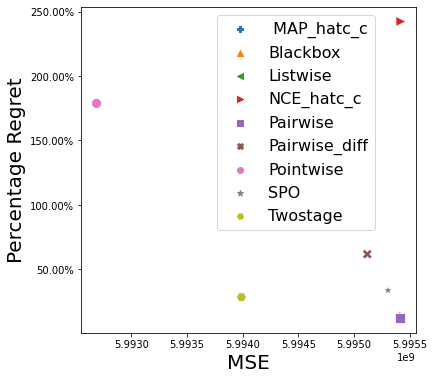

In [168]:
deg_df = pd.concat([ pointwise_selected, pairwise_selected,pairwise_diff_selected,
                       listwise_selected , nce_selected,
                        mapp_selected,spo_selected, bb_selected ,
                        twostage_selected])
deg_df =deg_df.groupby('model').agg({'val_mse':'mean','val_regret':'mean'}).reset_index(drop=False)
fig, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(data= deg_df, x="val_mse", y="val_regret", hue="model", style="model",
               markers=['P','^','<','>','s','X','o','*','H'],s=100)

plt.legend(prop={'size': 16},loc=1, bbox_to_anchor=(0., 0., 0.9, 1.))
# plt.ylim(0.85, 1.)
# ax.set_xticks(np.arange(0,5, 1))
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
plt.xlabel("MSE",fontsize=20)
plt.ylabel("Percentage Regret",fontsize=20)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.savefig("figures/data_N_{}_noise_{}_deg_{}_regvsmse.png".format(N,noise,deg),
bbox_inches='tight', dpi = 200)

plt.show()

### Boxplot

In [261]:
N, noise, deg = 1000,0.5,1

In [262]:
lr, l1_weight = 0.5, 1e-5
twostage_regret = pd.read_csv("Rslt/Twostage_Regret.csv")
twostage_regret.drop_duplicates(inplace= True)
twostage_regret = twostage_regret.groupby(['model','instance','lr', 'l1_weight', 'noise','deg','N']).mean().reset_index()
twostage_regret_selected = twostage_regret[(twostage_regret['N']==N)&
                                           (twostage_regret['deg']==deg) & 
                                           (twostage_regret['noise']==noise)]
twostage_regret_selected = twostage_regret_selected[(twostage_regret_selected['l1_weight']==l1_weight)&
                                                   (twostage_regret_selected['lr']==lr)]
twostage_regret_selected = twostage_regret_selected [['model','instance','regret']]

In [263]:
lr, l1_weight = 0.1, 1e-5
spo_regret = pd.read_csv("Rslt/SPO_Regret.csv")
spo_regret.drop_duplicates(inplace= True)
spo_regret = spo_regret.groupby(['model','instance','lr','l1_weight', 'noise','deg','N']).mean().reset_index()
spo_regret_selected = spo_regret[(spo_regret['N']==N)&
                                           (spo_regret['deg']==deg) & 
                                           (spo_regret['noise']==noise)]
spo_regret_selected = spo_regret_selected[(spo_regret_selected['l1_weight']==l1_weight)&
                                         (spo_regret_selected['lr']==lr)]
spo_regret_selected = spo_regret_selected [['model','instance','regret']]

In [264]:
lr,mu, l1_weight = 0.5,1., 1e-5
bb_regret = pd.read_csv("Rslt/Blackbox_Regret.csv")
bb_regret.drop_duplicates(inplace= True)
bb_regret = bb_regret.groupby(['model','instance','mu','lr','l1_weight', 'noise','deg','N']).mean().reset_index()
bb_regret_selected = bb_regret[(bb_regret['N']==N)&
                                           (bb_regret['deg']==deg) & 
                                           (bb_regret['noise']==noise)]
bb_regret_selected = bb_regret_selected[(bb_regret_selected['l1_weight']==l1_weight)&
                                         (bb_regret_selected['lr']==lr)&(bb_regret_selected['mu']==mu)]
bb_regret_selected = bb_regret_selected [['model','instance','regret']]

In [265]:
lr, margin, growth,l1_weight = 0.1,1.,0.1,1e-5
pairwise_regret = pd.read_csv("Rslt/Pairwise_Regret.csv")
pairwise_regret.drop_duplicates(inplace= True)
pairwise_regret = pairwise_regret.groupby(['model','instance','lr','l1_weight','margin', 'growth','noise','deg','N']).mean().reset_index()
pairwise_regret_selected = pairwise_regret[(pairwise_regret['N']==N)&
                                           (pairwise_regret['deg']==deg) & 
                                           (pairwise_regret['noise']==noise)]
pairwise_regret_selected = pairwise_regret_selected[(pairwise_regret_selected['l1_weight']== l1_weight)&
                                       (pairwise_regret_selected['margin']== margin)& (pairwise_regret_selected['lr']== lr)&
                                                   (pairwise_regret_selected['growth']== growth)]
pairwise_regret_selected = pairwise_regret_selected [['model','instance','regret']]

In [266]:
lr,temperature,  growth,l1_weight = 0.1,1, 0.1,1e-5
listwise_regret = pd.read_csv("Rslt/Listwise_Regret.csv")
listwise_regret.drop_duplicates(inplace= True)
listwise_regret = listwise_regret.groupby(['model','instance','lr','l1_weight','temperature', 'growth','noise','deg','N']).mean().reset_index()
listwise_regret_selected = listwise_regret[(listwise_regret['N']==N)&
                                           (listwise_regret['deg']==deg) & 
                                           (listwise_regret['noise']==noise)]
listwise_regret_selected = listwise_regret_selected[(listwise_regret_selected['l1_weight']== l1_weight)&
                        (listwise_regret_selected['lr']== lr)&(listwise_regret_selected['temperature']== temperature)&
                                                   (listwise_regret_selected['growth']== growth)]
listwise_regret_selected = listwise_regret_selected [['model','instance','regret']]

In [267]:
lr, growth,l1_weight = 0.8, 0.1,1e-5
pointwise_regret = pd.read_csv("Rslt/Pointwise_Regret.csv")
pointwise_regret.drop_duplicates(inplace= True)
pointwise_regret = pointwise_regret.groupby(['model','instance','lr','l1_weight', 'growth','noise','deg','N']).mean().reset_index()
pointwise_regret_selected = pointwise_regret[(pointwise_regret['N']==N)&
                                           (pointwise_regret['deg']==deg) & 
                                           (pointwise_regret['noise']==noise)]
pointwise_regret_selected = pointwise_regret_selected[(pointwise_regret_selected['l1_weight']== l1_weight)&
                        (pointwise_regret_selected['lr']== lr)&(pointwise_regret_selected['growth']== growth)]
pointwise_regret_selected = pointwise_regret_selected [['model','instance','regret']]

In [268]:
lr, growth,l1_weight = 0.1, 0.1,1e-5
pairwise_diff_regret = pd.read_csv("Rslt/Pairwisediff_Regret.csv")
pairwise_diff_regret.drop_duplicates(inplace= True)
pairwise_diff_regret = pairwise_diff_regret.groupby(['model','instance','lr','l1_weight', 'growth','noise','deg','N']).mean().reset_index()
pairwise_diff_regret_selected = pairwise_diff_regret[(pairwise_diff_regret['N']==N)&
                                           (pairwise_diff_regret['deg']==deg) & 
                                           (pairwise_diff_regret['noise']==noise)]
pairwise_diff_regret_selected = pairwise_diff_regret_selected[(pairwise_diff_regret_selected['l1_weight']== l1_weight)&
                        (pairwise_diff_regret_selected['lr']== lr)&(pairwise_diff_regret_selected['growth']== growth)]
pairwise_diff_regret_selected = pairwise_diff_regret_selected [['model','instance','regret']]

In [269]:
lr, growth,l1_weight = 0.5, 0.1,1e-5
nce_regret = pd.read_csv("Rslt/NCE_Regret.csv")
nce_regret.model = "NCE"
nce_regret.drop_duplicates(inplace= True)
nce_regret = nce_regret.groupby(['model','instance','lr','l1_weight', 'growth','noise','deg','N']).mean().reset_index()
nce_regret_selected = nce_regret[(nce_regret['N']==N)&
                                           (nce_regret['deg']==deg) & 
                                           (nce_regret['noise']==noise)]
nce_regret_selected = nce_regret_selected[(nce_regret_selected['l1_weight']== l1_weight)&
                        (nce_regret_selected['lr']== lr)&(nce_regret_selected['growth']== growth)]
nce_regret_selected = nce_regret_selected [['model','instance','regret']]

In [270]:
lr, growth,l1_weight = 0.05, 0.1,1e-5
mapp_regret = pd.read_csv("Rslt/MAP_Regret.csv")
mapp_regret.model = "MAP"
mapp_regret.drop_duplicates(inplace= True)
mapp_regret = mapp_regret.groupby(['model','instance','lr','l1_weight', 'growth','noise','deg','N']).mean().reset_index()
mapp_regret_selected = mapp_regret[(mapp_regret['N']==N)&
                                           (mapp_regret['deg']==deg) & 
                                           (mapp_regret['noise']==noise)]
mapp_regret_selected = mapp_regret_selected[(mapp_regret_selected['l1_weight']== l1_weight)&
                        (mapp_regret_selected['lr']== lr)&(mapp_regret_selected['growth']== growth)]
mapp_regret_selected = mapp_regret_selected [['model','instance','regret']]

In [271]:
plot_df = pd.concat([pointwise_regret_selected,pairwise_diff_regret_selected, 
                     pairwise_regret_selected, listwise_regret_selected, nce_regret_selected, mapp_regret_selected,
                     spo_regret_selected,bb_regret_selected, twostage_regret_selected],
                   ignore_index= True)
plot_df.groupby("model").agg({"regret":['mean','std','count']}).round(4)

regret               
                 mean     std  count
model                               
Blackbox       0.1876  0.0803  10000
Listwise       0.1556  0.1083  10000
MAP            0.1968  0.0804  10000
NCE            0.2363  0.0846  10000
Pairwise       0.1636  0.1100  10000
Pairwise_diff  0.1600  0.1056  10000
Pointwise      0.1548  0.1014  10000
SPO            0.1551  0.1026  10000
Twostage       0.1545  0.1021  10000

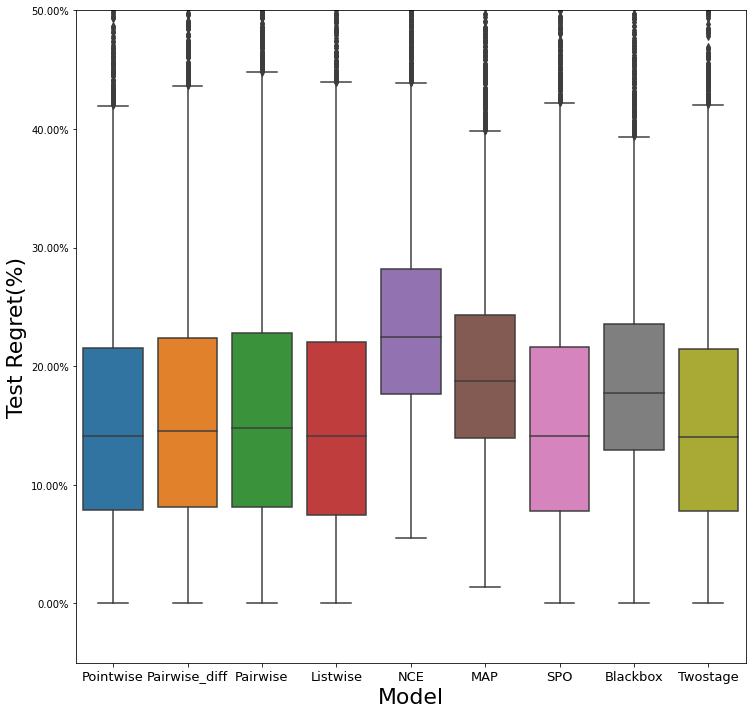

In [272]:
fig, ax = plt.subplots(figsize=(12,12))
# plt.figure(figsize=(12,12))
sns.boxplot(x="model", y="regret", data = plot_df)
plt.xlabel('Model', fontsize = 22)
plt.ylabel('Test Regret(%)', fontsize = 22)
plt.xticks(fontsize=13)
plt.ylim(-0.05,0.5)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.savefig("figures/Boxplot_data_N_{}_noise_{}_deg_{}.jpg".format(N,noise,deg))

In [256]:
N, noise, deg = 1000,0.5,2

In [257]:
lr, l1_weight = 0.5, 1e-5
twostage_regret = pd.read_csv("Rslt/Twostage_Regret.csv")
twostage_regret.drop_duplicates(inplace= True)
twostage_regret = twostage_regret.groupby(['model','instance','lr', 'l1_weight', 'noise','deg','N']).mean().reset_index()
twostage_regret_selected = twostage_regret[(twostage_regret['N']==N)&
                                           (twostage_regret['deg']==deg) & 
                                           (twostage_regret['noise']==noise)]
twostage_regret_selected = twostage_regret_selected[(twostage_regret_selected['l1_weight']==l1_weight)&
                                                   (twostage_regret_selected['lr']==lr)]
twostage_regret_selected = twostage_regret_selected [['model','instance','regret']]

In [258]:
lr, l1_weight = 0.5, 1e-5
spo_regret = pd.read_csv("Rslt/SPO_Regret.csv")
spo_regret.drop_duplicates(inplace= True)
spo_regret = spo_regret.groupby(['model','instance','lr','l1_weight', 'noise','deg','N']).mean().reset_index()
spo_regret_selected = spo_regret[(spo_regret['N']==N)&
                                           (spo_regret['deg']==deg) & 
                                           (spo_regret['noise']==noise)]
spo_regret_selected = spo_regret_selected[(spo_regret_selected['l1_weight']==l1_weight)&
                                         (spo_regret_selected['lr']==lr)]
spo_regret_selected = spo_regret_selected [['model','instance','regret']]

In [259]:
lr,mu, l1_weight = 0.5,1., 1e-5
bb_regret = pd.read_csv("Rslt/Blackbox_Regret.csv")
bb_regret.drop_duplicates(inplace= True)
bb_regret = bb_regret.groupby(['model','instance','mu','lr','l1_weight', 'noise','deg','N']).mean().reset_index()
bb_regret_selected = bb_regret[(bb_regret['N']==N)&
                                           (bb_regret['deg']==deg) & 
                                           (bb_regret['noise']==noise)]
bb_regret_selected = bb_regret_selected[(bb_regret_selected['l1_weight']==l1_weight)&
                                         (bb_regret_selected['lr']==lr)&(bb_regret_selected['mu']==mu)]
bb_regret_selected = bb_regret_selected [['model','instance','regret']]

In [260]:
lr, margin, growth,l1_weight = 0.1,0.1,0.1,1e-5
pairwise_regret = pd.read_csv("Rslt/Pairwise_Regret.csv")
pairwise_regret.drop_duplicates(inplace= True)
pairwise_regret = pairwise_regret.groupby(['model','instance','lr','l1_weight','margin', 'growth','noise','deg','N']).mean().reset_index()
pairwise_regret_selected = pairwise_regret[(pairwise_regret['N']==N)&
                                           (pairwise_regret['deg']==deg) & 
                                           (pairwise_regret['noise']==noise)]
pairwise_regret_selected = pairwise_regret_selected[(pairwise_regret_selected['l1_weight']== l1_weight)&
                                       (pairwise_regret_selected['margin']== margin)& (pairwise_regret_selected['lr']== lr)&
                                                   (pairwise_regret_selected['growth']== growth)]
pairwise_regret_selected = pairwise_regret_selected [['model','instance','regret']]

In [261]:
lr,temperature,  growth,l1_weight = 0.1,0.1, 0.1,1e-5
listwise_regret = pd.read_csv("Rslt/Listwise_Regret.csv")
listwise_regret.drop_duplicates(inplace= True)
listwise_regret = listwise_regret.groupby(['model','instance','lr','l1_weight','temperature', 'growth','noise','deg','N']).mean().reset_index()
listwise_regret_selected = listwise_regret[(listwise_regret['N']==N)&
                                           (listwise_regret['deg']==deg) & 
                                           (listwise_regret['noise']==noise)]
listwise_regret_selected = listwise_regret_selected[(listwise_regret_selected['l1_weight']== l1_weight)&
                        (listwise_regret_selected['lr']== lr)&(listwise_regret_selected['temperature']== temperature)&
                                                   (listwise_regret_selected['growth']== growth)]
listwise_regret_selected = listwise_regret_selected [['model','instance','regret']]

In [262]:
lr, growth,l1_weight = 0.8, 0.1,1e-5
pointwise_regret = pd.read_csv("Rslt/Pointwise_Regret.csv")
pointwise_regret.drop_duplicates(inplace= True)
pointwise_regret = pointwise_regret.groupby(['model','instance','lr','l1_weight', 'growth','noise','deg','N']).mean().reset_index()
pointwise_regret_selected = pointwise_regret[(pointwise_regret['N']==N)&
                                           (pointwise_regret['deg']==deg) & 
                                           (pointwise_regret['noise']==noise)]
pointwise_regret_selected = pointwise_regret_selected[(pointwise_regret_selected['l1_weight']== l1_weight)&
                        (pointwise_regret_selected['lr']== lr)&(pointwise_regret_selected['growth']== growth)]
pointwise_regret_selected = pointwise_regret_selected [['model','instance','regret']]

In [263]:
lr, growth,l1_weight = 0.1, 0.1,1e-5
pairwise_diff_regret = pd.read_csv("Rslt/Pairwisediff_Regret.csv")
pairwise_diff_regret.drop_duplicates(inplace= True)
pairwise_diff_regret = pairwise_diff_regret.groupby(['model','instance','lr','l1_weight', 'growth','noise','deg','N']).mean().reset_index()
pairwise_diff_regret_selected = pairwise_diff_regret[(pairwise_diff_regret['N']==N)&
                                           (pairwise_diff_regret['deg']==deg) & 
                                           (pairwise_diff_regret['noise']==noise)]
pairwise_diff_regret_selected = pairwise_diff_regret_selected[(pairwise_diff_regret_selected['l1_weight']== l1_weight)&
                        (pairwise_diff_regret_selected['lr']== lr)&(pairwise_diff_regret_selected['growth']== growth)]
pairwise_diff_regret_selected = pairwise_diff_regret_selected [['model','instance','regret']]

In [264]:
lr, growth,l1_weight = 0.5, 0.1,1e-5
nce_regret = pd.read_csv("Rslt/NCE_Regret.csv")
nce_regret.model = "NCE"
nce_regret.drop_duplicates(inplace= True)
nce_regret = nce_regret.groupby(['model','instance','lr','l1_weight', 'growth','noise','deg','N']).mean().reset_index()
nce_regret_selected = nce_regret[(nce_regret['N']==N)&
                                           (nce_regret['deg']==deg) & 
                                           (nce_regret['noise']==noise)]
nce_regret_selected = nce_regret_selected[(nce_regret_selected['l1_weight']== l1_weight)&
                        (nce_regret_selected['lr']== lr)&(nce_regret_selected['growth']== growth)]
nce_regret_selected = nce_regret_selected [['model','instance','regret']]

In [265]:
lr, growth,l1_weight = 0.05, 0.1,1e-5
mapp_regret = pd.read_csv("Rslt/MAP_Regret.csv")
mapp_regret.model = "MAP"
mapp_regret.drop_duplicates(inplace= True)
mapp_regret = mapp_regret.groupby(['model','instance','lr','l1_weight', 'growth','noise','deg','N']).mean().reset_index()
mapp_regret_selected = mapp_regret[(mapp_regret['N']==N)&
                                           (mapp_regret['deg']==deg) & 
                                           (mapp_regret['noise']==noise)]
mapp_regret_selected = mapp_regret_selected[(mapp_regret_selected['l1_weight']== l1_weight)&
                        (mapp_regret_selected['lr']== lr)&(mapp_regret_selected['growth']== growth)]
mapp_regret_selected = mapp_regret_selected [['model','instance','regret']]

In [266]:
plot_df = pd.concat([pointwise_regret_selected,pairwise_diff_regret_selected, 
                     pairwise_regret_selected, listwise_regret_selected, nce_regret_selected, mapp_regret_selected,
                     spo_regret_selected,bb_regret_selected, twostage_regret_selected],
                   ignore_index= True)
plot_df.groupby("model").agg({"regret":['mean','std','count']}).round(4)

regret               
                 mean     std  count
model                               
Blackbox       0.1326  0.0770  10000
Listwise       0.1041  0.0934  10000
MAP            0.1415  0.0785  10000
NCE            0.3084  0.1401  10000
Pairwise       0.1074  0.0929  10000
Pairwise_diff  0.1160  0.1027  10000
Pointwise      0.1006  0.0944  10000
SPO            0.1006  0.0950  10000
Twostage       0.1007  0.0928  10000

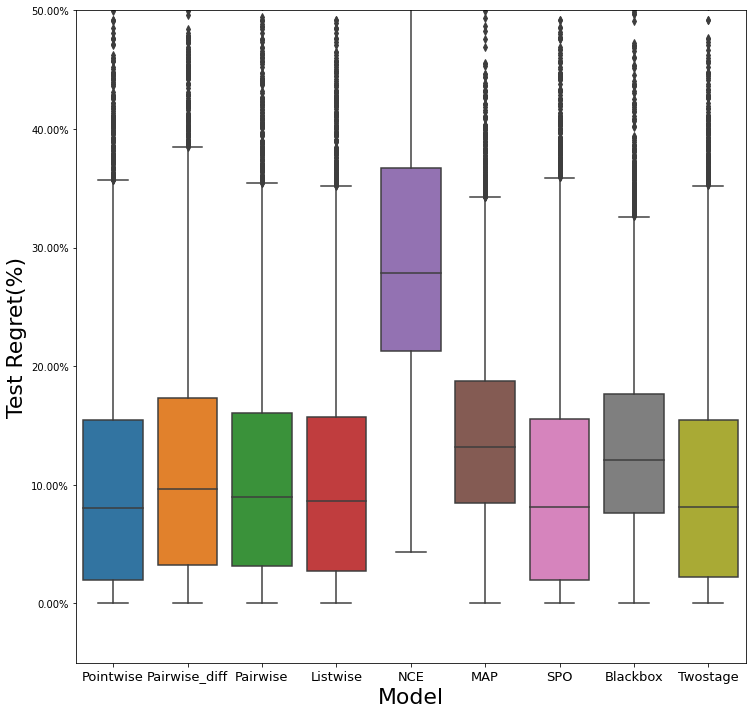

In [267]:
fig, ax = plt.subplots(figsize=(12,12))
# plt.figure(figsize=(12,12))
sns.boxplot(x="model", y="regret", data = plot_df)
plt.xlabel('Model', fontsize = 22)
plt.ylabel('Test Regret(%)', fontsize = 22)
plt.xticks(fontsize=13)
plt.ylim(-0.05,0.5)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.savefig("figures/Boxplot_data_N_{}_noise_{}_deg_{}.jpg".format(N,noise,deg))

In [268]:
N, noise, deg = 1000,0.5,4

In [269]:
lr, l1_weight = 0.1, 1e-5
twostage_regret = pd.read_csv("Rslt/Twostage_Regret.csv")
twostage_regret.drop_duplicates(inplace= True)
twostage_regret = twostage_regret.groupby(['model','instance','lr', 'l1_weight', 'noise','deg','N']).mean().reset_index()
twostage_regret_selected = twostage_regret[(twostage_regret['N']==N)&
                                           (twostage_regret['deg']==deg) & 
                                           (twostage_regret['noise']==noise)]
twostage_regret_selected = twostage_regret_selected[(twostage_regret_selected['l1_weight']==l1_weight)&
                                                   (twostage_regret_selected['lr']==lr)]
twostage_regret_selected = twostage_regret_selected [['model','instance','regret']]

In [270]:
lr, l1_weight = 0.5, 1e-5
spo_regret = pd.read_csv("Rslt/SPO_Regret.csv")
spo_regret.drop_duplicates(inplace= True)
spo_regret = spo_regret.groupby(['model','instance','lr','l1_weight', 'noise','deg','N']).mean().reset_index()
spo_regret_selected = spo_regret[(spo_regret['N']==N)&
                                           (spo_regret['deg']==deg) & 
                                           (spo_regret['noise']==noise)]
spo_regret_selected = spo_regret_selected[(spo_regret_selected['l1_weight']==l1_weight)&
                                         (spo_regret_selected['lr']==lr)]
spo_regret_selected = spo_regret_selected [['model','instance','regret']]

In [271]:
lr,mu, l1_weight = 0.5,1., 1e-5
bb_regret = pd.read_csv("Rslt/Blackbox_Regret.csv")
bb_regret.drop_duplicates(inplace= True)
bb_regret = bb_regret.groupby(['model','instance','mu','lr','l1_weight', 'noise','deg','N']).mean().reset_index()
bb_regret_selected = bb_regret[(bb_regret['N']==N)&
                                           (bb_regret['deg']==deg) & 
                                           (bb_regret['noise']==noise)]
bb_regret_selected = bb_regret_selected[(bb_regret_selected['l1_weight']==l1_weight)&
                                         (bb_regret_selected['lr']==lr)&(bb_regret_selected['mu']==mu)]
bb_regret_selected = bb_regret_selected [['model','instance','regret']]

In [272]:
lr, margin, growth,l1_weight = 0.1,0.1,0.1,1e-5
pairwise_regret = pd.read_csv("Rslt/Pairwise_Regret.csv")
pairwise_regret.drop_duplicates(inplace= True)
pairwise_regret = pairwise_regret.groupby(['model','instance','lr','l1_weight','margin', 'growth','noise','deg','N']).mean().reset_index()
pairwise_regret_selected = pairwise_regret[(pairwise_regret['N']==N)&
                                           (pairwise_regret['deg']==deg) & 
                                           (pairwise_regret['noise']==noise)]
pairwise_regret_selected = pairwise_regret_selected[(pairwise_regret_selected['l1_weight']== l1_weight)&
                                       (pairwise_regret_selected['margin']== margin)& (pairwise_regret_selected['lr']== lr)&
                                                   (pairwise_regret_selected['growth']== growth)]
pairwise_regret_selected = pairwise_regret_selected [['model','instance','regret']]

In [273]:
lr,temperature,  growth,l1_weight = 0.1,0.05, 0.1,1e-5
listwise_regret = pd.read_csv("Rslt/Listwise_Regret.csv")
listwise_regret.drop_duplicates(inplace= True)
listwise_regret = listwise_regret.groupby(['model','instance','lr','l1_weight','temperature', 'growth','noise','deg','N']).mean().reset_index()
listwise_regret_selected = listwise_regret[(listwise_regret['N']==N)&
                                           (listwise_regret['deg']==deg) & 
                                           (listwise_regret['noise']==noise)]
listwise_regret_selected = listwise_regret_selected[(listwise_regret_selected['l1_weight']== l1_weight)&
                        (listwise_regret_selected['lr']== lr)&(listwise_regret_selected['temperature']== temperature)&
                                                   (listwise_regret_selected['growth']== growth)]
listwise_regret_selected = listwise_regret_selected [['model','instance','regret']]

In [274]:
lr, growth,l1_weight = 0.8, 0.1,1e-5
pointwise_regret = pd.read_csv("Rslt/Pointwise_Regret.csv")
pointwise_regret.drop_duplicates(inplace= True)
pointwise_regret = pointwise_regret.groupby(['model','instance','lr','l1_weight', 'growth','noise','deg','N']).mean().reset_index()
pointwise_regret_selected = pointwise_regret[(pointwise_regret['N']==N)&
                                           (pointwise_regret['deg']==deg) & 
                                           (pointwise_regret['noise']==noise)]
pointwise_regret_selected = pointwise_regret_selected[(pointwise_regret_selected['l1_weight']== l1_weight)&
                        (pointwise_regret_selected['lr']== lr)&(pointwise_regret_selected['growth']== growth)]
pointwise_regret_selected = pointwise_regret_selected [['model','instance','regret']]

In [275]:
lr, growth,l1_weight = 0.1, 0.1,1e-5
pairwise_diff_regret = pd.read_csv("Rslt/Pairwisediff_Regret.csv")
pairwise_diff_regret.drop_duplicates(inplace= True)
pairwise_diff_regret = pairwise_diff_regret.groupby(['model','instance','lr','l1_weight', 'growth','noise','deg','N']).mean().reset_index()
pairwise_diff_regret_selected = pairwise_diff_regret[(pairwise_diff_regret['N']==N)&
                                           (pairwise_diff_regret['deg']==deg) & 
                                           (pairwise_diff_regret['noise']==noise)]
pairwise_diff_regret_selected = pairwise_diff_regret_selected[(pairwise_diff_regret_selected['l1_weight']== l1_weight)&
                        (pairwise_diff_regret_selected['lr']== lr)&(pairwise_diff_regret_selected['growth']== growth)]
pairwise_diff_regret_selected = pairwise_diff_regret_selected [['model','instance','regret']]

In [276]:
lr, growth,l1_weight = 0.5, 0.1,1e-5
nce_regret = pd.read_csv("Rslt/NCE_Regret.csv")
nce_regret.model = "NCE"
nce_regret.drop_duplicates(inplace= True)
nce_regret = nce_regret.groupby(['model','instance','lr','l1_weight', 'growth','noise','deg','N']).mean().reset_index()
nce_regret_selected = nce_regret[(nce_regret['N']==N)&
                                           (nce_regret['deg']==deg) & 
                                           (nce_regret['noise']==noise)]
nce_regret_selected = nce_regret_selected[(nce_regret_selected['l1_weight']== l1_weight)&
                        (nce_regret_selected['lr']== lr)&(nce_regret_selected['growth']== growth)]
nce_regret_selected = nce_regret_selected [['model','instance','regret']]

In [277]:
lr, growth,l1_weight = 0.05, 0.1,1e-5
mapp_regret = pd.read_csv("Rslt/MAP_Regret.csv")
mapp_regret.model = "MAP"
mapp_regret.drop_duplicates(inplace= True)
mapp_regret = mapp_regret.groupby(['model','instance','lr','l1_weight', 'growth','noise','deg','N']).mean().reset_index()
mapp_regret_selected = mapp_regret[(mapp_regret['N']==N)&
                                           (mapp_regret['deg']==deg) & 
                                           (mapp_regret['noise']==noise)]
mapp_regret_selected = mapp_regret_selected[(mapp_regret_selected['l1_weight']== l1_weight)&
                        (mapp_regret_selected['lr']== lr)&(mapp_regret_selected['growth']== growth)]
mapp_regret_selected = mapp_regret_selected [['model','instance','regret']]

In [278]:
plot_df = pd.concat([pointwise_regret_selected,pairwise_diff_regret_selected, 
                     pairwise_regret_selected, listwise_regret_selected, nce_regret_selected, mapp_regret_selected,
                     spo_regret_selected,bb_regret_selected, twostage_regret_selected],
                   ignore_index= True)
plot_df.groupby("model").agg({"regret":['mean','std','count']}).round(4)

regret               
                 mean     std  count
model                               
Blackbox       0.0939  0.0963  10000
Listwise       0.0771  0.0996  10000
MAP            0.0944  0.0983  10000
NCE            0.6520  0.4730  10000
Pairwise       0.0806  0.1187  10000
Pairwise_diff  0.1789  0.1932  10000
Pointwise      0.1927  0.2626  10000
SPO            0.0798  0.1194  10000
Twostage       0.1044  0.1284  10000

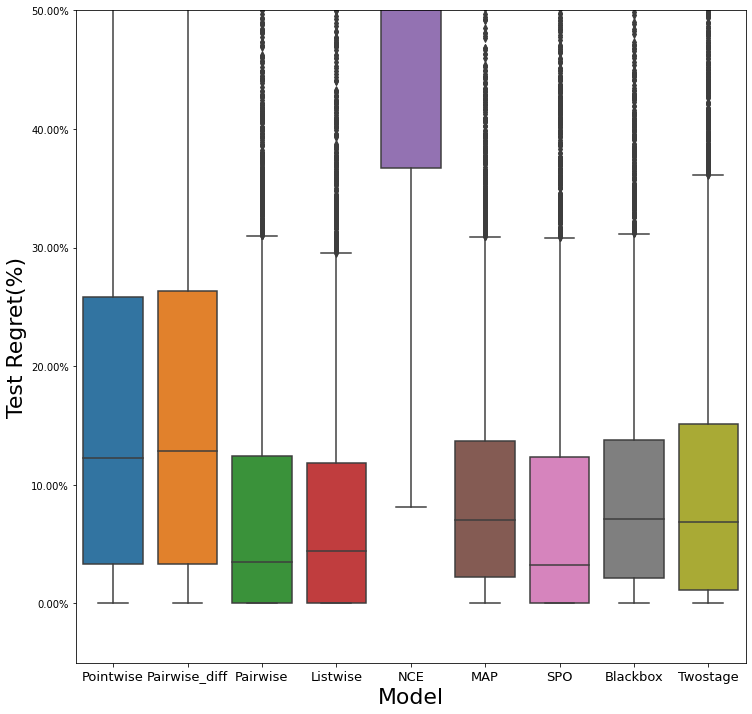

In [279]:
fig, ax = plt.subplots(figsize=(12,12))
# plt.figure(figsize=(12,12))
sns.boxplot(x="model", y="regret", data = plot_df)
plt.xlabel('Model', fontsize = 22)
plt.ylabel('Test Regret(%)', fontsize = 22)
plt.xticks(fontsize=13)
plt.ylim(-0.05,0.5)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.savefig("figures/Boxplot_data_N_{}_noise_{}_deg_{}.jpg".format(N,noise,deg))

In [273]:
N, noise, deg = 1000,0.5,6

In [274]:
lr, l1_weight = 0.5, 1e-5
twostage_regret = pd.read_csv("Rslt/Twostage_Regret.csv")
twostage_regret.drop_duplicates(inplace= True)
twostage_regret = twostage_regret.groupby(['model','instance','lr', 'l1_weight', 'noise','deg','N']).mean().reset_index()
twostage_regret_selected = twostage_regret[(twostage_regret['N']==N)&
                                           (twostage_regret['deg']==deg) & 
                                           (twostage_regret['noise']==noise)]
twostage_regret_selected = twostage_regret_selected[(twostage_regret_selected['l1_weight']==l1_weight)&
                                                   (twostage_regret_selected['lr']==lr)]
twostage_regret_selected = twostage_regret_selected [['model','instance','regret']]

In [275]:
lr, l1_weight = 0.5, 1e-5
spo_regret = pd.read_csv("Rslt/SPO_Regret.csv")
spo_regret.drop_duplicates(inplace= True)
spo_regret = spo_regret.groupby(['model','instance','lr','l1_weight', 'noise','deg','N']).mean().reset_index()
spo_regret_selected = spo_regret[(spo_regret['N']==N)&
                                           (spo_regret['deg']==deg) & 
                                           (spo_regret['noise']==noise)]
spo_regret_selected = spo_regret_selected[(spo_regret_selected['l1_weight']==l1_weight)&
                                         (spo_regret_selected['lr']==lr)]
spo_regret_selected = spo_regret_selected [['model','instance','regret']]

In [276]:
lr,mu, l1_weight = 0.5,1., 1e-5
bb_regret = pd.read_csv("Rslt/Blackbox_Regret.csv")
bb_regret.drop_duplicates(inplace= True)
bb_regret = bb_regret.groupby(['model','instance','mu','lr','l1_weight', 'noise','deg','N']).mean().reset_index()
bb_regret_selected = bb_regret[(bb_regret['N']==N)&
                                           (bb_regret['deg']==deg) & 
                                           (bb_regret['noise']==noise)]
bb_regret_selected = bb_regret_selected[(bb_regret_selected['l1_weight']==l1_weight)&
                                         (bb_regret_selected['lr']==lr)&(bb_regret_selected['mu']==mu)]
bb_regret_selected = bb_regret_selected [['model','instance','regret']]

In [277]:
lr, margin, growth,l1_weight = 0.1,0.1,0.1,1e-5
pairwise_regret = pd.read_csv("Rslt/Pairwise_Regret.csv")
pairwise_regret.drop_duplicates(inplace= True)
pairwise_regret = pairwise_regret.groupby(['model','instance','lr','l1_weight','margin', 'growth','noise','deg','N']).mean().reset_index()
pairwise_regret_selected = pairwise_regret[(pairwise_regret['N']==N)&
                                           (pairwise_regret['deg']==deg) & 
                                           (pairwise_regret['noise']==noise)]
pairwise_regret_selected = pairwise_regret_selected[(pairwise_regret_selected['l1_weight']== l1_weight)&
                                       (pairwise_regret_selected['margin']== margin)& (pairwise_regret_selected['lr']== lr)&
                                                   (pairwise_regret_selected['growth']== growth)]
pairwise_regret_selected = pairwise_regret_selected [['model','instance','regret']]

In [278]:
lr,temperature,  growth,l1_weight = 0.1,0.05,0.1,1e-5
listwise_regret = pd.read_csv("Rslt/Listwise_Regret.csv")
listwise_regret.drop_duplicates(inplace= True)
listwise_regret = listwise_regret.groupby(['model','instance','lr','l1_weight','temperature', 'growth','noise','deg','N']).mean().reset_index()
listwise_regret_selected = listwise_regret[(listwise_regret['N']==N)&
                                           (listwise_regret['deg']==deg) & 
                                           (listwise_regret['noise']==noise)]
listwise_regret_selected = listwise_regret_selected[(listwise_regret_selected['l1_weight']== l1_weight)&
                        (listwise_regret_selected['lr']== lr)&(listwise_regret_selected['temperature']== temperature)&
                                                   (listwise_regret_selected['growth']== growth)]
listwise_regret_selected = listwise_regret_selected [['model','instance','regret']]

In [279]:
lr, growth,l1_weight = 0.8, 0.1,1e-5
pointwise_regret = pd.read_csv("Rslt/Pointwise_Regret.csv")
pointwise_regret.drop_duplicates(inplace= True)
pointwise_regret = pointwise_regret.groupby(['model','instance','lr','l1_weight', 'growth','noise','deg','N']).mean().reset_index()
pointwise_regret_selected = pointwise_regret[(pointwise_regret['N']==N)&
                                           (pointwise_regret['deg']==deg) & 
                                           (pointwise_regret['noise']==noise)]
pointwise_regret_selected = pointwise_regret_selected[(pointwise_regret_selected['l1_weight']== l1_weight)&
                        (pointwise_regret_selected['lr']== lr)&(pointwise_regret_selected['growth']== growth)]
pointwise_regret_selected = pointwise_regret_selected [['model','instance','regret']]

In [280]:
lr, growth,l1_weight = 0.5, 0.1,1e-5
pairwise_diff_regret = pd.read_csv("Rslt/Pairwisediff_Regret.csv")
pairwise_diff_regret.drop_duplicates(inplace= True)
pairwise_diff_regret = pairwise_diff_regret.groupby(['model','instance','lr','l1_weight', 'growth','noise','deg','N']).mean().reset_index()
pairwise_diff_regret_selected = pairwise_diff_regret[(pairwise_diff_regret['N']==N)&
                                           (pairwise_diff_regret['deg']==deg) & 
                                           (pairwise_diff_regret['noise']==noise)]
pairwise_diff_regret_selected = pairwise_diff_regret_selected[(pairwise_diff_regret_selected['l1_weight']== l1_weight)&
                        (pairwise_diff_regret_selected['lr']== lr)&(pairwise_diff_regret_selected['growth']== growth)]
pairwise_diff_regret_selected = pairwise_diff_regret_selected [['model','instance','regret']]

In [281]:
lr, growth,l1_weight = 0.5, 0.1,1e-5
nce_regret = pd.read_csv("Rslt/NCE_Regret.csv")
nce_regret.model = "NCE"
nce_regret.drop_duplicates(inplace= True)
nce_regret = nce_regret.groupby(['model','instance','lr','l1_weight', 'growth','noise','deg','N']).mean().reset_index()
nce_regret_selected = nce_regret[(nce_regret['N']==N)&
                                           (nce_regret['deg']==deg) & 
                                           (nce_regret['noise']==noise)]
nce_regret_selected = nce_regret_selected[(nce_regret_selected['l1_weight']== l1_weight)&
                        (nce_regret_selected['lr']== lr)&(nce_regret_selected['growth']== growth)]
nce_regret_selected = nce_regret_selected [['model','instance','regret']]

In [282]:
lr, growth,l1_weight = 0.7, 0.1,1e-5
mapp_regret = pd.read_csv("Rslt/MAP_Regret.csv")
mapp_regret.model = "MAP"
mapp_regret.drop_duplicates(inplace= True)
mapp_regret = mapp_regret.groupby(['model','instance','lr','l1_weight', 'growth','noise','deg','N']).mean().reset_index()
mapp_regret_selected = mapp_regret[(mapp_regret['N']==N)&
                                           (mapp_regret['deg']==deg) & 
                                           (mapp_regret['noise']==noise)]
mapp_regret_selected = mapp_regret_selected[(mapp_regret_selected['l1_weight']== l1_weight)&
                        (mapp_regret_selected['lr']== lr)&(mapp_regret_selected['growth']== growth)]
mapp_regret_selected = mapp_regret_selected [['model','instance','regret']]

In [283]:
plot_df = pd.concat([pointwise_regret_selected,pairwise_diff_regret_selected, 
                     pairwise_regret_selected, listwise_regret_selected, nce_regret_selected, mapp_regret_selected,
                     spo_regret_selected,bb_regret_selected, twostage_regret_selected],
                   ignore_index= True)
plot_df.groupby("model").agg({"regret":['mean','std','count']}).round(4)

regret               
                 mean     std  count
model                               
Blackbox       0.0969  0.1767  10000
Listwise       0.0829  0.1828  10000
MAP            0.0945  0.1644  10000
NCE            1.2942  1.9368  10000
Pairwise       0.0927  0.2052  10000
Pairwise_diff  0.3265  0.4412  10000
Pointwise      0.7218  1.7089  10000
SPO            0.1619  0.3137  10000
Twostage       0.1596  0.3221  10000

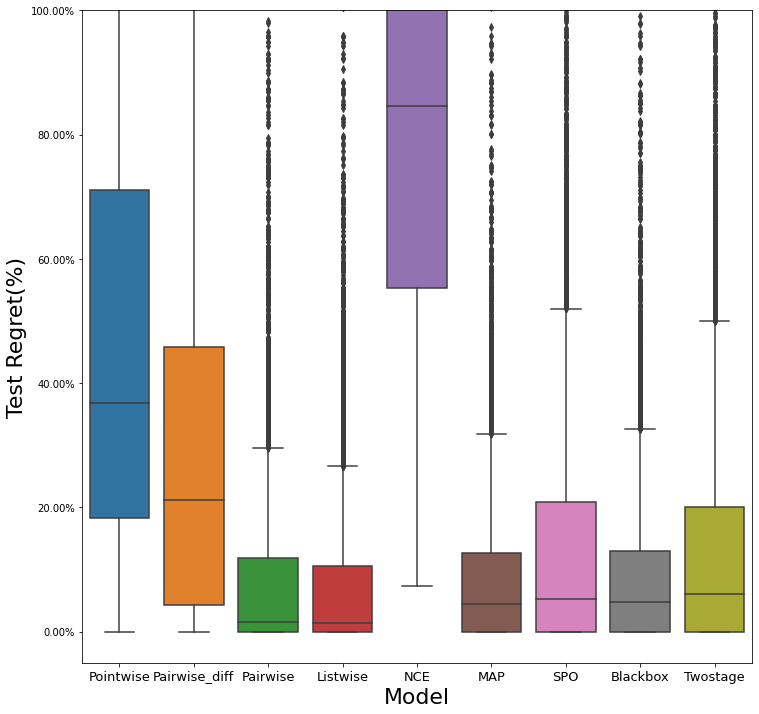

In [315]:
fig, ax = plt.subplots(figsize=(12,12))
# plt.figure(figsize=(12,12))
sns.boxplot(x="model", y="regret", data = plot_df)
plt.xlabel('Model', fontsize = 22)
plt.ylabel('Test Regret(%)', fontsize = 22)
plt.xticks(fontsize=13)
plt.ylim(-0.05,1.)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.savefig("figures/Boxplot_data_N_{}_noise_{}_deg_{}.jpg".format(N,noise,deg))

In [292]:
N, noise, deg = 1000,0.5,8

In [293]:
lr, l1_weight = 0.5, 1e-5
twostage_regret = pd.read_csv("Rslt/Twostage_Regret.csv")
twostage_regret.drop_duplicates(inplace= True)
twostage_regret = twostage_regret.groupby(['model','instance','lr', 'l1_weight', 'noise','deg','N']).mean().reset_index()
twostage_regret_selected = twostage_regret[(twostage_regret['N']==N)&
                                           (twostage_regret['deg']==deg) & 
                                           (twostage_regret['noise']==noise)]
twostage_regret_selected = twostage_regret_selected[(twostage_regret_selected['l1_weight']==l1_weight)&
                                                   (twostage_regret_selected['lr']==lr)]
twostage_regret_selected = twostage_regret_selected [['model','instance','regret']]

In [294]:
lr, l1_weight = 0.1, 1e-5
spo_regret = pd.read_csv("Rslt/SPO_Regret.csv")
spo_regret.drop_duplicates(inplace= True)
spo_regret = spo_regret.groupby(['model','instance','lr','l1_weight', 'noise','deg','N']).mean().reset_index()
spo_regret_selected = spo_regret[(spo_regret['N']==N)&
                                           (spo_regret['deg']==deg) & 
                                           (spo_regret['noise']==noise)]
spo_regret_selected = spo_regret_selected[(spo_regret_selected['l1_weight']==l1_weight)&
                                         (spo_regret_selected['lr']==lr)]
spo_regret_selected = spo_regret_selected [['model','instance','regret']]

In [295]:
lr,mu, l1_weight = 0.5,1., 1e-5
bb_regret = pd.read_csv("Rslt/Blackbox_Regret.csv")
bb_regret.drop_duplicates(inplace= True)
bb_regret = bb_regret.groupby(['model','instance','mu','lr','l1_weight', 'noise','deg','N']).mean().reset_index()
bb_regret_selected = bb_regret[(bb_regret['N']==N)&
                                           (bb_regret['deg']==deg) & 
                                           (bb_regret['noise']==noise)]
bb_regret_selected = bb_regret_selected[(bb_regret_selected['l1_weight']==l1_weight)&
                                         (bb_regret_selected['lr']==lr)&(bb_regret_selected['mu']==mu)]
bb_regret_selected = bb_regret_selected [['model','instance','regret']]

In [296]:
lr, margin, growth,l1_weight = 0.1,0.1,0.1,1e-5
pairwise_regret = pd.read_csv("Rslt/Pairwise_Regret.csv")
pairwise_regret.drop_duplicates(inplace= True)
pairwise_regret = pairwise_regret.groupby(['model','instance','lr','l1_weight','margin', 'growth','noise','deg','N']).mean().reset_index()
pairwise_regret_selected = pairwise_regret[(pairwise_regret['N']==N)&
                                           (pairwise_regret['deg']==deg) & 
                                           (pairwise_regret['noise']==noise)]
pairwise_regret_selected = pairwise_regret_selected[(pairwise_regret_selected['l1_weight']== l1_weight)&
                                       (pairwise_regret_selected['margin']== margin)& (pairwise_regret_selected['lr']== lr)&
                                                   (pairwise_regret_selected['growth']== growth)]
pairwise_regret_selected = pairwise_regret_selected [['model','instance','regret']]

In [297]:
lr,temperature,  growth,l1_weight = 0.1,0.05,0.1,1e-5
listwise_regret = pd.read_csv("Rslt/Listwise_Regret.csv")
listwise_regret.drop_duplicates(inplace= True)
listwise_regret = listwise_regret.groupby(['model','instance','lr','l1_weight','temperature', 'growth','noise','deg','N']).mean().reset_index()
listwise_regret_selected = listwise_regret[(listwise_regret['N']==N)&
                                           (listwise_regret['deg']==deg) & 
                                           (listwise_regret['noise']==noise)]
listwise_regret_selected = listwise_regret_selected[(listwise_regret_selected['l1_weight']== l1_weight)&
                        (listwise_regret_selected['lr']== lr)&(listwise_regret_selected['temperature']== temperature)&
                                                   (listwise_regret_selected['growth']== growth)]
listwise_regret_selected = listwise_regret_selected [['model','instance','regret']]

In [298]:
lr, growth,l1_weight = 0.8, 0.1,1e-5
pointwise_regret = pd.read_csv("Rslt/Pointwise_Regret.csv")
pointwise_regret.drop_duplicates(inplace= True)
pointwise_regret = pointwise_regret.groupby(['model','instance','lr','l1_weight', 'growth','noise','deg','N']).mean().reset_index()
pointwise_regret_selected = pointwise_regret[(pointwise_regret['N']==N)&
                                           (pointwise_regret['deg']==deg) & 
                                           (pointwise_regret['noise']==noise)]
pointwise_regret_selected = pointwise_regret_selected[(pointwise_regret_selected['l1_weight']== l1_weight)&
                        (pointwise_regret_selected['lr']== lr)&(pointwise_regret_selected['growth']== growth)]
pointwise_regret_selected = pointwise_regret_selected [['model','instance','regret']]

In [299]:
lr, growth,l1_weight = 0.5, 0.1,1e-5
pairwise_diff_regret = pd.read_csv("Rslt/Pairwisediff_Regret.csv")
pairwise_diff_regret.drop_duplicates(inplace= True)
pairwise_diff_regret = pairwise_diff_regret.groupby(['model','instance','lr','l1_weight', 'growth','noise','deg','N']).mean().reset_index()
pairwise_diff_regret_selected = pairwise_diff_regret[(pairwise_diff_regret['N']==N)&
                                           (pairwise_diff_regret['deg']==deg) & 
                                           (pairwise_diff_regret['noise']==noise)]
pairwise_diff_regret_selected = pairwise_diff_regret_selected[(pairwise_diff_regret_selected['l1_weight']== l1_weight)&
                        (pairwise_diff_regret_selected['lr']== lr)&(pairwise_diff_regret_selected['growth']== growth)]
pairwise_diff_regret_selected = pairwise_diff_regret_selected [['model','instance','regret']]

In [300]:
lr, growth,l1_weight = 0.5, 0.1,1e-5
nce_regret = pd.read_csv("Rslt/NCE_Regret.csv")
nce_regret.model = "NCE"
nce_regret.drop_duplicates(inplace= True)
nce_regret = nce_regret.groupby(['model','instance','lr','l1_weight', 'growth','noise','deg','N']).mean().reset_index()
nce_regret_selected = nce_regret[(nce_regret['N']==N)&
                                           (nce_regret['deg']==deg) & 
                                           (nce_regret['noise']==noise)]
nce_regret_selected = nce_regret_selected[(nce_regret_selected['l1_weight']== l1_weight)&
                        (nce_regret_selected['lr']== lr)&(nce_regret_selected['growth']== growth)]
nce_regret_selected = nce_regret_selected [['model','instance','regret']]

In [301]:
lr, growth,l1_weight = 0.7, 0.1,1e-5
mapp_regret = pd.read_csv("Rslt/MAP_Regret.csv")
mapp_regret.model = "MAP"
mapp_regret.drop_duplicates(inplace= True)
mapp_regret = mapp_regret.groupby(['model','instance','lr','l1_weight', 'growth','noise','deg','N']).mean().reset_index()
mapp_regret_selected = mapp_regret[(mapp_regret['N']==N)&
                                           (mapp_regret['deg']==deg) & 
                                           (mapp_regret['noise']==noise)]
mapp_regret_selected = mapp_regret_selected[(mapp_regret_selected['l1_weight']== l1_weight)&
                        (mapp_regret_selected['lr']== lr)&(mapp_regret_selected['growth']== growth)]
mapp_regret_selected = mapp_regret_selected [['model','instance','regret']]

In [302]:
plot_df = pd.concat([pointwise_regret_selected,pairwise_diff_regret_selected, 
                     pairwise_regret_selected, listwise_regret_selected, nce_regret_selected, mapp_regret_selected,
                     spo_regret_selected,bb_regret_selected, twostage_regret_selected],
                   ignore_index= True)
plot_df.groupby("model").agg({"regret":['mean','std','count']}).round(4)

regret               
                 mean     std  count
model                               
Blackbox       0.1414  0.7197  10000
Listwise       0.1238  0.5326  10000
MAP            0.1368  0.5269  10000
NCE            2.4229  5.9411  10000
Pairwise       0.1275  0.4064  10000
Pairwise_diff  0.6180  1.0038  10000
Pointwise      1.7876  7.5870  10000
SPO            0.3375  0.7384  10000
Twostage       0.2850  0.7760  10000

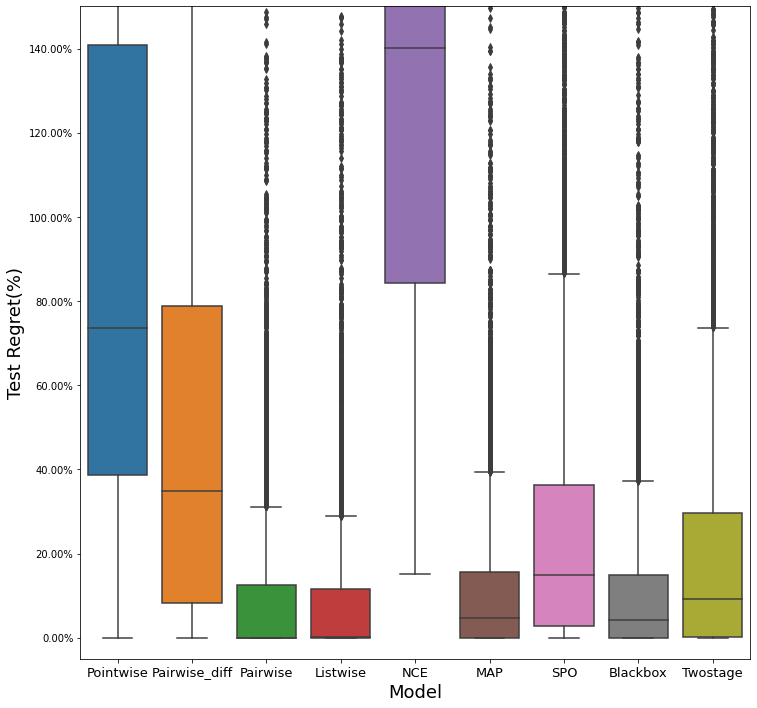

In [303]:
fig, ax = plt.subplots(figsize=(12,12))
# plt.figure(figsize=(12,12))
sns.boxplot(x="model", y="regret", data = plot_df)
plt.xlabel('Model', fontsize = 18)
plt.ylabel('Test Regret(%)', fontsize = 18)
plt.xticks(fontsize=13)
plt.ylim(-0.05,1.5)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.savefig("figures/Boxplot_data_N_{}_noise_{}_deg_{}.jpg".format(N,noise,deg))

### Learning Curve Plot

In [245]:
N, noise, deg,growth = 1000,0.5,1,0.1

In [246]:
df_pointwise = pd.read_csv("LearningCurve/Pointwise_data_data_N_{}_noise_{}_deg_{}_growth{}.csv".format(N,noise,deg,growth))
df_pairwisediff = pd.read_csv("LearningCurve/Pairwise_diff_data_N_{}_noise_{}_deg_{}_growth{}.csv".format(N,noise,deg,growth))

df_pairwise = pd.read_csv("LearningCurve/Pairwise_data_N_{}_noise_{}_deg_{}_growth{}.csv".format(N,noise,deg,growth))
df_listwise = pd.read_csv("LearningCurve/Listwise_data_N_{}_noise_{}_deg_{}_growth{}.csv".format(N,noise,deg,growth))

In [247]:
plot_df = pd.concat([df_pointwise, df_pairwise,df_pairwisediff, df_listwise  ],ignore_index=True)
plot_df= plot_df[plot_df.step<240]

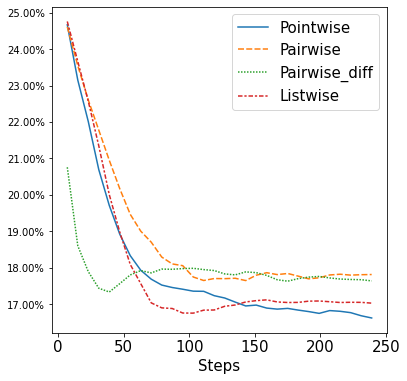

In [248]:
fig, ax = plt.subplots(figsize=(6,6))
sns.lineplot(data= plot_df, x="step", y="val_regret", hue="model",style='model',ci=None)
plt.xlabel('Steps', fontsize = 15)
plt.ylabel('', fontsize = 15)
plt.xticks(fontsize=15)
# plt.xlim(0, 750)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.legend( prop={'size': 15})
plt.savefig("figures/LC_data_N_{}_noise_{}_deg_{}.jpg".format(N,noise,deg))

In [232]:
df_twostage.step.describe()

NameError: name 'df_twostage' is not defined